In [ ]:
import numpy as np
from numpy import sqrt, mean, absolute
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Dataset



##training

In [ ]:
df = pd.read_excel('Train_Fladeo.xlsx', engine='openpyxl')
df

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,target
0,38,59,84,63,56,78,43,32,65,38,39,63,62
1,59,84,63,56,78,43,32,65,38,39,63,62,42
2,84,63,56,78,43,32,65,38,39,63,62,42,49
3,63,56,78,43,32,65,38,39,63,62,42,49,61
4,56,78,43,32,65,38,39,63,62,42,49,61,60
5,78,43,32,65,38,39,63,62,42,49,61,60,55
6,43,32,65,38,39,63,62,42,49,61,60,55,60
7,32,65,38,39,63,62,42,49,61,60,55,60,62
8,65,38,39,63,62,42,49,61,60,55,60,62,62
9,38,39,63,62,42,49,61,60,55,60,62,62,57


##testing

In [ ]:
dft = pd.read_excel('Test_Fladeo.xlsx', engine='openpyxl')
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12
0,42,49,61,60,55,60,62,62,57,50,87,89
1,49,61,60,55,60,62,62,57,50,87,89,65
2,61,60,55,60,62,62,57,50,87,89,65,87
3,60,55,60,62,62,57,50,87,89,65,87,98
4,55,60,62,62,57,50,87,89,65,87,98,93
5,60,62,62,57,50,87,89,65,87,98,93,30
6,62,62,57,50,87,89,65,87,98,93,30,21
7,62,57,50,87,89,65,87,98,93,30,21,37
8,57,50,87,89,65,87,98,93,30,21,37,23
9,50,87,89,65,87,98,93,30,21,37,23,28


# Normalisasi


##Training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_norm = mmscaler.fit_transform(df)
pd.DataFrame(dataset_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.109091,0.473684,0.912281,0.543860,0.363636,0.696970,0.191176,0.142857,0.571429,0.220779,0.233766,0.545455,0.532468
1,0.490909,0.912281,0.543860,0.421053,0.696970,0.166667,0.029412,0.571429,0.220779,0.233766,0.545455,0.532468,0.272727
2,0.945455,0.543860,0.421053,0.807018,0.166667,0.000000,0.514706,0.220779,0.233766,0.545455,0.532468,0.272727,0.363636
3,0.563636,0.421053,0.807018,0.192982,0.000000,0.500000,0.117647,0.233766,0.545455,0.532468,0.272727,0.363636,0.519481
4,0.436364,0.807018,0.192982,0.000000,0.500000,0.090909,0.132353,0.545455,0.532468,0.272727,0.363636,0.519481,0.506494
5,0.836364,0.192982,0.000000,0.578947,0.090909,0.106061,0.485294,0.532468,0.272727,0.363636,0.519481,0.506494,0.441558
6,0.200000,0.000000,0.578947,0.105263,0.106061,0.469697,0.470588,0.272727,0.363636,0.519481,0.506494,0.441558,0.506494
7,0.000000,0.578947,0.105263,0.122807,0.469697,0.454545,0.176471,0.363636,0.519481,0.506494,0.441558,0.506494,0.532468
8,0.600000,0.105263,0.122807,0.543860,0.454545,0.151515,0.279412,0.519481,0.506494,0.441558,0.506494,0.532468,0.532468
9,0.109091,0.122807,0.543860,0.526316,0.151515,0.257576,0.455882,0.506494,0.441558,0.506494,0.532468,0.532468,0.467532


##Testing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_tes_norm = mmscaler.fit_transform(dft)
pd.DataFrame(dataset_tes_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000,0.282051,0.208333,0.104167,0.441176,0.532468,0.532468,0.467532,0.376623,0.857143,0.883117
1,0.148936,0.300,0.256410,0.104167,0.208333,0.470588,0.532468,0.467532,0.376623,0.857143,0.883117,0.571429
2,0.404255,0.275,0.128205,0.208333,0.250000,0.470588,0.467532,0.376623,0.857143,0.883117,0.571429,0.857143
3,0.382979,0.150,0.256410,0.250000,0.250000,0.397059,0.376623,0.857143,0.883117,0.571429,0.857143,1.000000
4,0.276596,0.275,0.307692,0.250000,0.145833,0.294118,0.857143,0.883117,0.571429,0.857143,1.000000,0.935065
5,0.382979,0.325,0.307692,0.145833,0.000000,0.838235,0.883117,0.571429,0.857143,1.000000,0.935065,0.116883
6,0.425532,0.325,0.179487,0.000000,0.770833,0.867647,0.571429,0.857143,1.000000,0.935065,0.116883,0.000000
7,0.425532,0.200,0.000000,0.770833,0.812500,0.514706,0.857143,1.000000,0.935065,0.116883,0.000000,0.207792
8,0.319149,0.025,0.948718,0.812500,0.312500,0.838235,1.000000,0.935065,0.116883,0.000000,0.207792,0.025974
9,0.170213,0.950,1.000000,0.312500,0.770833,1.000000,0.935065,0.116883,0.000000,0.207792,0.025974,0.090909


# Pembagian data input dan target


##training

In [ ]:
X = dataset_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y_norm = dataset_norm[:, [-1]]
y = y_norm.reshape(24)


##testing

In [ ]:
x_tes = dataset_tes_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

# K-Fold Cross validation

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X,y):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] TEST: [ 3 13 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19 21 22 23] TEST: [14 17 20]
TRAIN: [ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 2  4 10]
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23] TEST: [ 6  7 19]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23] TEST: [ 1 21]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23] TEST: [ 0 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22] TEST: [15 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23] TEST: [ 9 22]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 8 12]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 5 11]


##Menampilkan hasil split data

In [ ]:
for train_index, test_index in cv.split(X):
   print("------------------------------------------------------------------------")
   print("Index TRAIN:", train_index, "Index TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print("X_TRAIN: \n",X_train,"\n X_Test: \n",X_test,"\n Y_Train: \n", y_train,"\nY_Test: ", y_test)
   print("------------------------------------------------------------------------\n\n")

------------------------------------------------------------------------
Index TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] Index TEST: [ 3 13 18]
X_TRAIN: 
 [[0.10909091 0.47368421 0.9122807  0.54385965 0.36363636 0.6969697
  0.19117647 0.14285714 0.57142857 0.22077922 0.23376623 0.54545455]
 [0.49090909 0.9122807  0.54385965 0.42105263 0.6969697  0.16666667
  0.02941176 0.57142857 0.22077922 0.23376623 0.54545455 0.53246753]
 [0.94545455 0.54385965 0.42105263 0.80701754 0.16666667 0.
  0.51470588 0.22077922 0.23376623 0.54545455 0.53246753 0.27272727]
 [0.43636364 0.80701754 0.19298246 0.         0.5        0.09090909
  0.13235294 0.54545455 0.53246753 0.27272727 0.36363636 0.51948052]
 [0.83636364 0.19298246 0.         0.57894737 0.09090909 0.10606061
  0.48529412 0.53246753 0.27272727 0.36363636 0.51948052 0.50649351]
 [0.2        0.         0.57894737 0.10526316 0.10606061 0.46969697
  0.47058824 0.27272727 0.36363636 0.51948052 0.50649351 0.44155844]
 [

## Pembangunan Model Regresi

In [ ]:
## membangun model
model = KNeighborsRegressor(metric='euclidean')
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluasi

RMSE value for k=  1 is: 0.43469649062425036
RMSE value for k=  2 is: 0.4349453864308589
RMSE value for k=  3 is: 0.4444624815964758
RMSE value for k=  4 is: 0.4641941301612834
RMSE value for k=  5 is: 0.4724441376538217
RMSE value for k=  6 is: 0.48237328147813363
RMSE value for k=  7 is: 0.49073040106621907
RMSE value for k=  8 is: 0.5033975475795358
RMSE value for k=  9 is: 0.4996150514297979
RMSE value for k=  10 is: 0.5090735154728089
RMSE value for k=  11 is: 0.511958528426676
RMSE value for k=  12 is: 0.5137187230449426
RMSE value for k=  13 is: 0.5115710719977838
RMSE value for k=  14 is: 0.5062686813704254


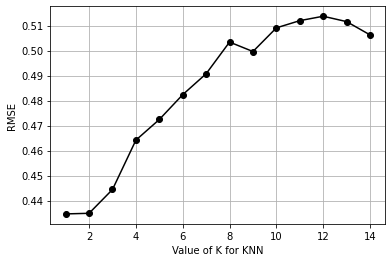

In [ ]:
k_range = range(1, 15)
rmse_err = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')    
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    RMSE = sqrt(mean(absolute(scores)))
    rmse_err.append(RMSE) 
    print('RMSE value for k= ' , k , 'is:', RMSE)
plt.plot(k_range, rmse_err, '-ok')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#Performance Measure

In [ ]:
#akurasi RMSE
model = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)    
sqrt(mean(absolute(scores)))

0.4349453864308589

# Model terbaik

In [ ]:
model = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

# Prediksi Penjualan

In [ ]:
y_pred = model.predict(x_tes)
y_pred
dft['prediksi'] = y_pred
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,prediksi
0,42,49,61,60,55,60,62,62,57,50,87,89,0.519481
1,49,61,60,55,60,62,62,57,50,87,89,65,0.616883
2,61,60,55,60,62,62,57,50,87,89,65,87,0.941558
3,60,55,60,62,62,57,50,87,89,65,87,98,0.753247
4,55,60,62,62,57,50,87,89,65,87,98,93,0.344156
5,60,62,62,57,50,87,89,65,87,98,93,30,0.428571
6,62,62,57,50,87,89,65,87,98,93,30,21,0.532468
7,62,57,50,87,89,65,87,98,93,30,21,37,0.116883
8,57,50,87,89,65,87,98,93,30,21,37,23,0.058442
9,50,87,89,65,87,98,93,30,21,37,23,28,0.344156


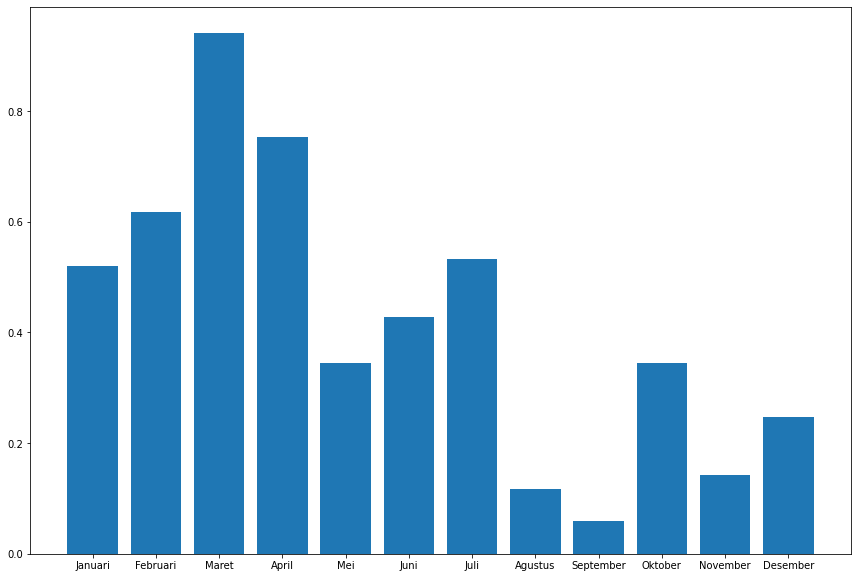

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.9,1.9])
Prediksi = np.array(dft['prediksi'])
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

ax.bar(Bulan,Prediksi)
plt.show()